In [132]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [381]:
df = pd.read_csv('./Company_Data2015-1.csv')

In [382]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974.0,Hind.Cables,-8021.60,419.36,"-7,027.48","-1,007.24","5,936.03",474.3,"-1,076.34",40.5,...,0,0,0,0,0,0,0,45.0,0.00,0
1,21214.0,Tata Tele. Mah.,-3986.19,"1,954.93","-2,968.08","4,458.20","7,410.18","9,070.86","-1,098.88",486.86,...,-10.3,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852.0,ABG Shipyard,-3192.58,53.84,506.86,"7,714.68","6,944.54","1,281.54","4,496.25","9,097.64",...,"-5,279.14","-5,516.98","-7,780.25","-7,723.67","-7,961.51",97,558,0.0,-0.03,-0.26
3,2439.0,GTL,-3054.51,157.3,-623.49,"2,353.88","2,326.05","1,033.69","-2,612.42","1,034.12",...,-3.33,-7.21,-48.13,-47.7,-51.58,93,63,2.0,0.24,1.9
4,23505.0,Bharati Defence,-2967.36,50.3,"-1,070.83","4,675.33","5,740.90","1,084.20","1,836.23","4,685.81",...,-295.55,-400.55,-845.88,379.79,274.79,"3,887",346,0.0,0.01,0.05


In [383]:
df.describe()

,Co_Code,Networth Next Year,Total Asset Turnover Ratio[Latest],Inventory Velocity (Days),Value of Output/Total Assets
count,3586.000000,3586.000000,3585.000000,3483.000000,3586.000000
mean,16065.388734,725.045251,1.237236,79.644559,0.819757
std,19776.817379,4769.681004,2.673228,137.847792,1.201400
min,4.000000,-8021.600000,0.000000,-199.000000,-0.330000
25%,3029.250000,3.985000,0.070000,0.000000,0.070000
50%,6077.500000,19.015000,0.600000,35.000000,0.480000
75%,24269.500000,123.802500,1.550000,96.000000,1.160000
max,72493.000000,111729.100000,57.750000,996.000000,17.630000


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   float64
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   object 
 4   Networth                             3586 non-null   object 
 5   Capital Employed                     3586 non-null   object 
 6   Total Debt                           3586 non-null   object 
 7   Gross Block                          3586 non-null   object 
 8   Net Working Capital                  3586 non-null   object 
 9   Current Assets                       3586 non-null   object 
 10  Current Liabilities and Provisions   3586 non-null   object 
 11  Total Assets/Liabilities      

In [385]:
df.isnull().sum()

Co_Code                         1477
Co_Name                         1477
Networth Next Year              1477
Equity Paid Up                  1477
Networth                        1477
                                ... 
Debtors Velocity (Days)         1477
Creditors Velocity (Days)       1477
Inventory Velocity (Days)       1580
Value of Output/Total Assets    1477
Value of Output/Gross Block     1477
Length: 67, dtype: int64

In [386]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 5063 
The number of columns (variables) is 67


In [387]:
print(np.where(df.isnull().sum()>0))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),)


## Data Prepocessing

In [388]:
df.dtypes

Co_Code                         float64
Co_Name                          object
Networth Next Year              float64
Equity Paid Up                   object
Networth                         object
                                 ...   
Debtors Velocity (Days)          object
Creditors Velocity (Days)        object
Inventory Velocity (Days)       float64
Value of Output/Total Assets    float64
Value of Output/Gross Block      object
Length: 67, dtype: object

##### There are missing values in the dataset

In [389]:
df['Co_Name'].fillna('No_Name',inplace=True)
df['Co_Code'].fillna(000,inplace=True)

In [392]:
df.replace(',','', regex=True, inplace=True)

In [393]:
for c in df.columns[2:]:
    df[c] = df[c].astype(float)

In [394]:
# for i in df.columns[df.isnull().any(axis=0)]: 
#     df[i].fillna(df[i].mean(),inplace=True)

for c in df.columns[2:]:
    df[c].fillna((df[c].mean()), inplace=True)    

In [395]:
df.isnull().sum()

Co_Code                         0
Co_Name                         0
Networth Next Year              0
Equity Paid Up                  0
Networth                        0
                               ..
Debtors Velocity (Days)         0
Creditors Velocity (Days)       0
Inventory Velocity (Days)       0
Value of Output/Total Assets    0
Value of Output/Gross Block     0
Length: 67, dtype: int64

In [396]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974.0,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,45.0,0.00,0.00
1,21214.0,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29.0,101.0,2.0,0.31,0.24
2,14852.0,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97.0,558.0,0.0,-0.03,-0.26
3,2439.0,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93.0,63.0,2.0,0.24,1.90
4,23505.0,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887.0,346.0,0.0,0.01,0.05


## Creating a target variable 

In [397]:
df['Target'] = df.apply(lambda x : 0 if int(x['Networth Next Year']) > 0 else 1,axis=1)

In [398]:
df['Target'].value_counts()

0    4538
1     525
Name: Target, dtype: int64

In [192]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

### Checking Outliers in dataset

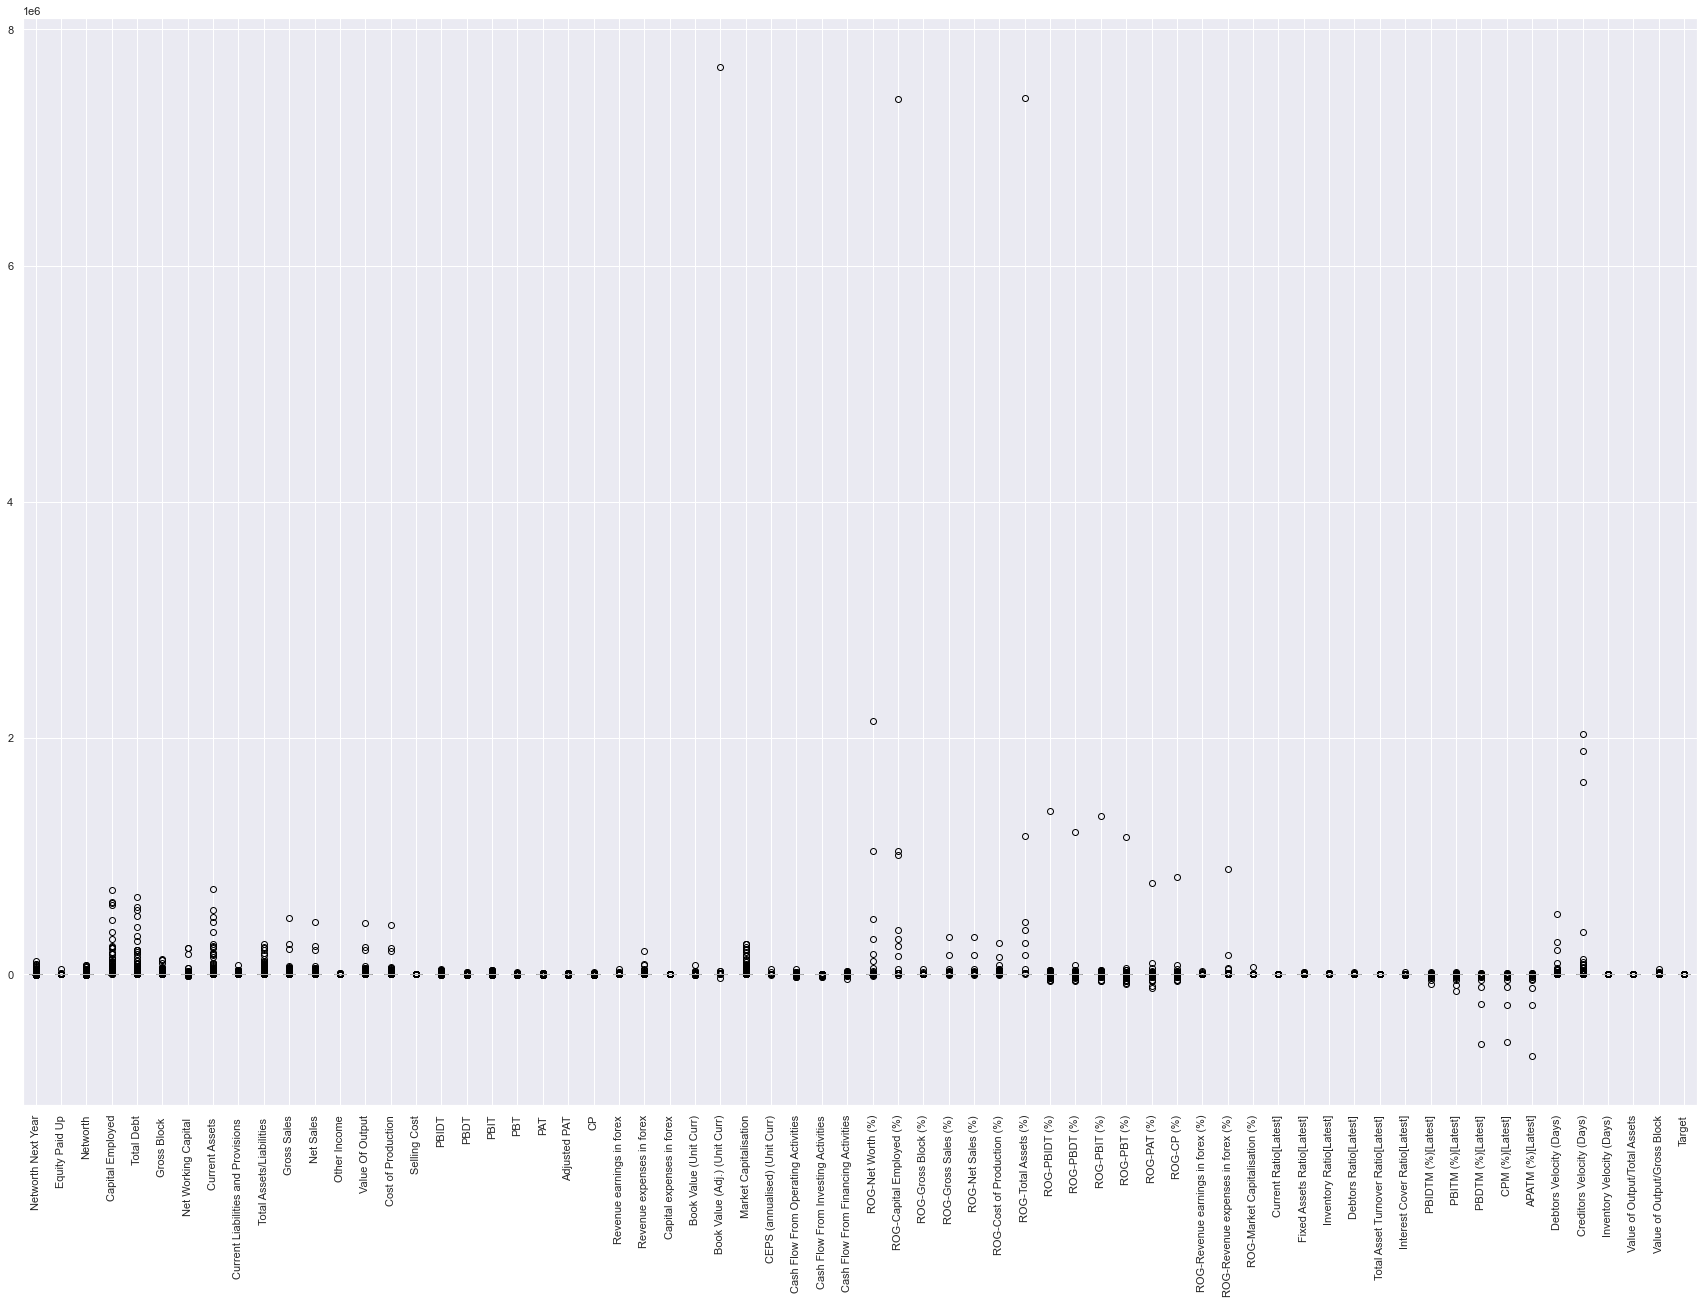

In [399]:
df.iloc[:,2:].boxplot(figsize= (30,20),rot=90).get_figure().savefig('check_outliers.png')

In [401]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(df)

Co_Code --------- 545
Networth Next Year --------- 209
Equity Paid Up --------- 164
Networth --------- 204
Capital Employed --------- 113
Total Debt --------- 91
Gross Block  --------- 173
Net Working Capital  --------- 177
Current Assets  --------- 104
Current Liabilities and Provisions  --------- 187
Total Assets/Liabilities  --------- 187
Gross Sales --------- 183
Net Sales --------- 185
Other Income --------- 144
Value Of Output --------- 189
Cost of Production --------- 179
Selling Cost --------- 207
PBIDT --------- 157
PBDT --------- 238
PBIT --------- 165
PBT --------- 265
PAT --------- 283
Adjusted PAT --------- 265
CP --------- 246
Revenue earnings in forex --------- 194
Revenue expenses in forex --------- 111
Capital expenses in forex --------- 117
Book Value (Unit Curr) --------- 188
Book Value (Adj.) (Unit Curr) --------- 13
Market Capitalisation --------- 175
CEPS (annualised) (Unit Curr) --------- 123
Cash Flow From Operating Activities --------- 305
Cash Flow From Invest

In [402]:
from sklearn.preprocessing import StandardScaler

In [403]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [404]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [405]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

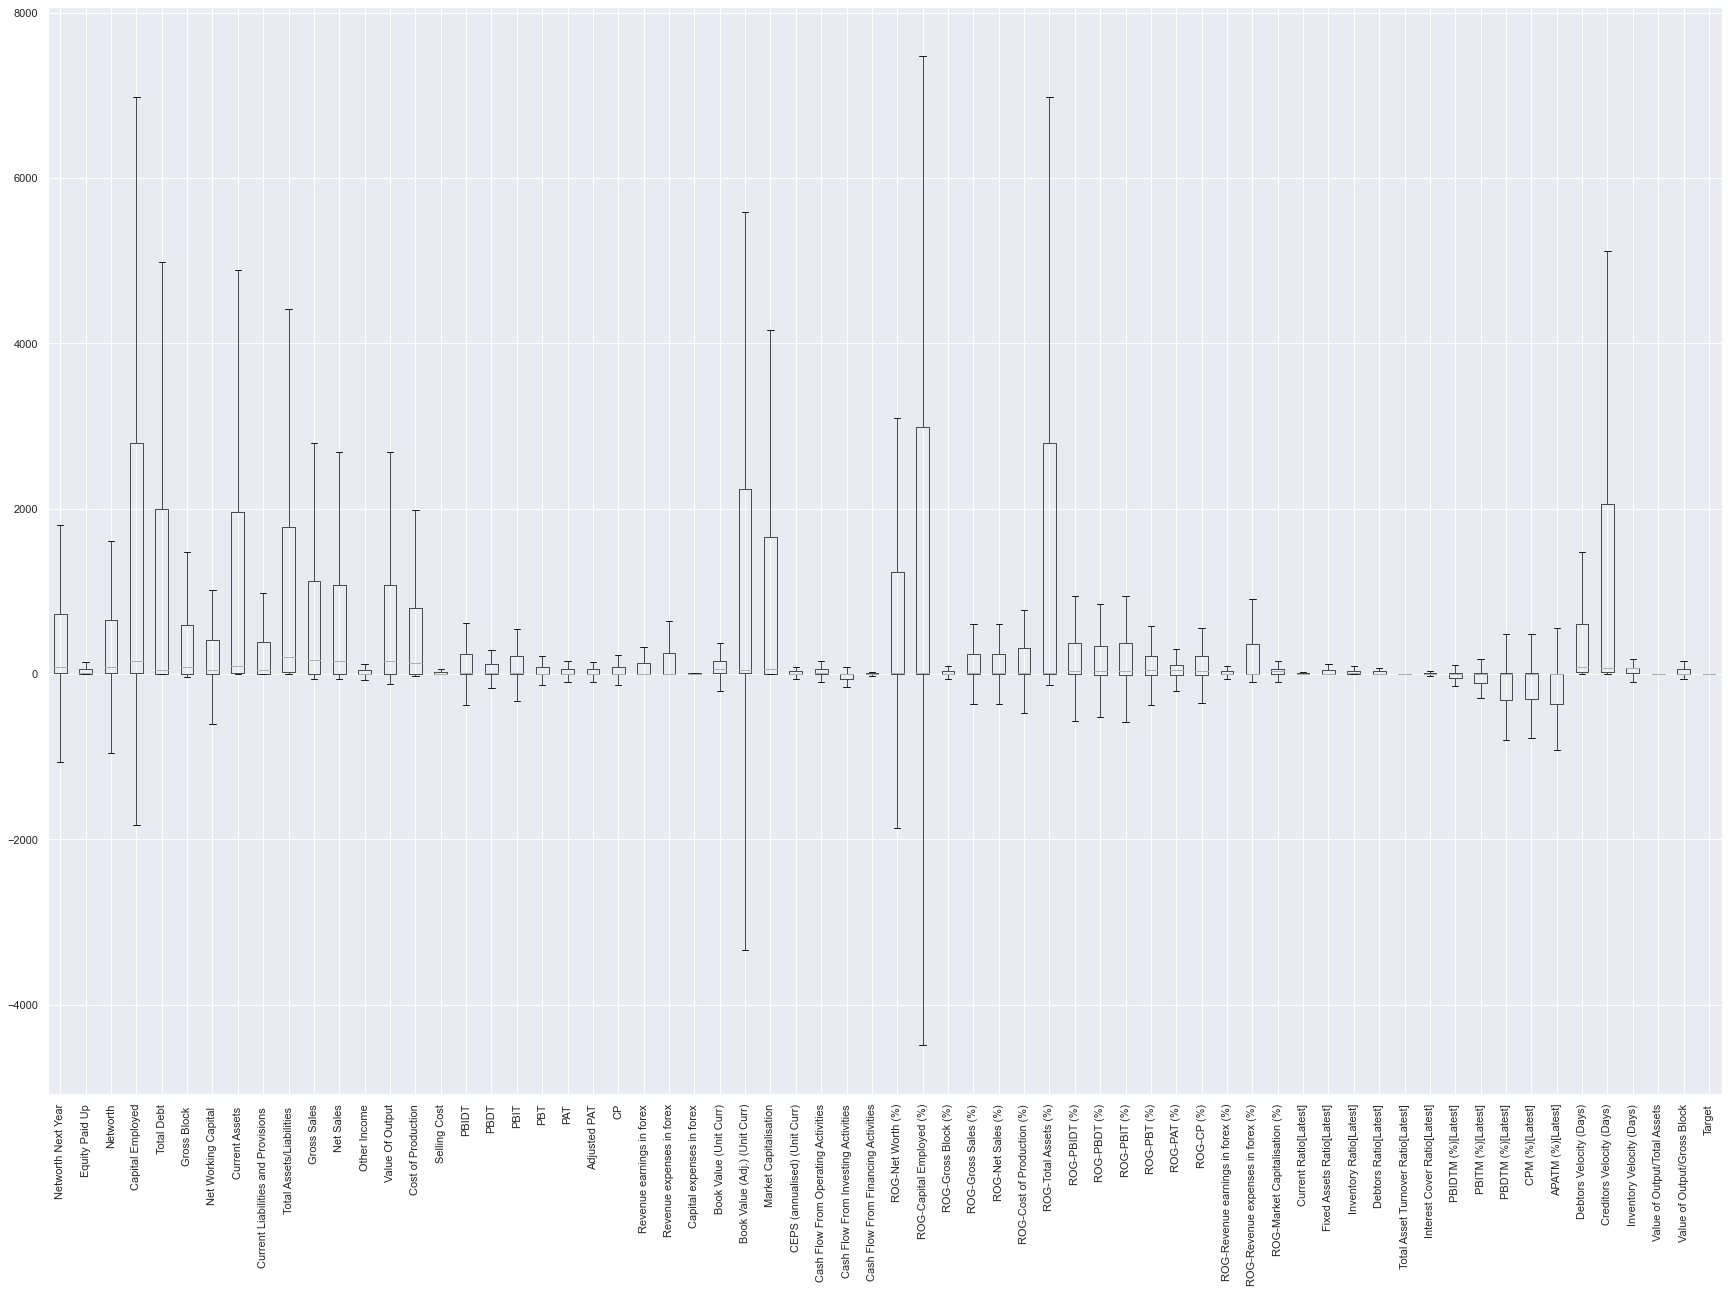

In [406]:
df.iloc[:,2:].boxplot(figsize= (30,20),rot=90).get_figure().savefig('outliers.png')

In [330]:
def check_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

### lets check outliers(Lower and Upper whiskers) in these variables

In [331]:
check_outlier(df['Networth Next Year'])

(-1068.042876464027, 1800.8981274400446)

In [332]:
check_outlier(df[ 'Total Asset Turnover Ratio[Latest]' ])

(-1.380853556485354, 2.8080892608089227)

In [343]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [349]:
for i in df.iloc[:,2:]:
    df[i]=treat_outlier(df[i].astype(int))

-5.0 7.0 725.0 1218.3999999999978 <built-in function min> <built-in function max>
0.0 5.0 62.0 88.0 <built-in function min> <built-in function max>
-3.0 7.0 649.0 1053.199999999997 <built-in function min> <built-in function max>
0.0 15.0 2799.0 2799.0 <built-in function min> <built-in function max>
0.0 1.0 1994.0 1994.0 <built-in function min> <built-in function max>
0.0 3.0 594.0 880.899999999996 <built-in function min> <built-in function max>
-3.0 3.0 410.0 472.29999999999745 <built-in function min> <built-in function max>
0.0 9.0 1960.0 1960.0 <built-in function min> <built-in function max>
0.0 2.0 391.0 594.6999999999989 <built-in function min> <built-in function max>
2.0 20.5 1778.0 3004.499999999998 <built-in function min> <built-in function max>
0.0 5.0 1123.0 1926.8999999999996 <built-in function min> <built-in function max>
0.0 5.0 1079.0 1869.599999999995 <built-in function min> <built-in function max>
0.0 0.0 48.0 48.0 <built-in function min> <built-in function max>
0.0 5.0 

## Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15cb0c8e0>,
      dtype=object)

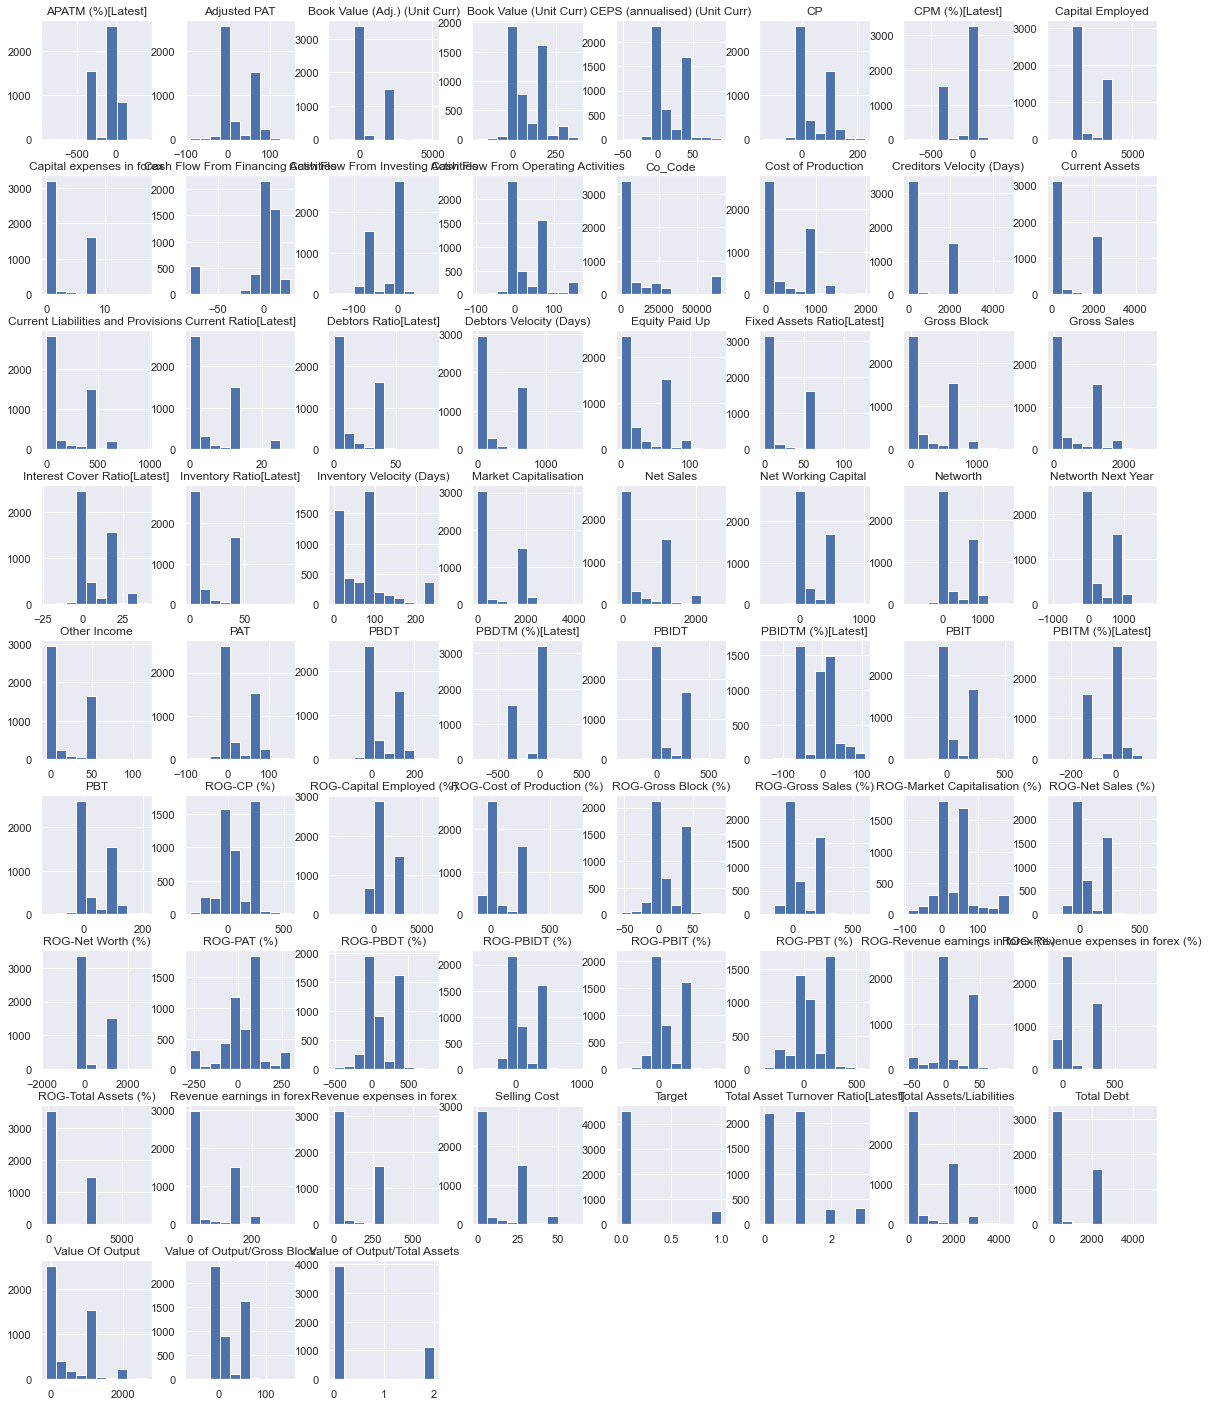

In [352]:
df.hist(figsize=(20,25))

## Multicollinearity

In [354]:
from sklearn.feature_selection import VarianceThreshold

high_variance_selector = VarianceThreshold(threshold = 0.) 

features_with_variance = high_variance_selector.fit_transform(df.iloc[:,2:-1])
features_with_variance = pd.DataFrame(features_with_variance)

# print("Num of features before zero-variance features' removal: ", raw_features.shape[1])

#Give column names again
# custom_column_names_feat_with_variance = ["feature"+str(idx) for idx in df.columns] 
# features_with_variance.columns = custom_column_names_feat_with_variance
min_variables_to_keep = 15
count_of_features = len(df)

In [355]:
features_with_variance

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-5.0,88.0,-3.0,-1007.0,1994.0,474.0,-3.0,40.0,594.7,109.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0
1,-5.0,88.0,-3.0,4458.0,1994.0,880.9,-3.0,486.0,594.7,3004.5,...,-10.0,-39.0,-57.0,-57.0,-87.0,29.0,101.0,2.0,0.0,0.0
2,-5.0,53.0,506.0,2799.0,1994.0,1281.0,472.3,1960.0,594.7,3004.5,...,-51.0,-109.0,-311.0,-307.0,-365.0,97.0,558.0,0.0,0.0,0.0
3,-5.0,88.0,-623.0,2353.0,2326.0,1033.0,-3.0,1034.0,594.7,3004.5,...,-3.0,-7.0,-48.0,-47.0,-51.0,93.0,63.0,2.0,0.0,1.0
4,-5.0,50.0,-3.0,4675.0,1994.0,1084.0,472.3,4685.0,594.7,3004.5,...,-51.0,-109.0,-311.0,379.0,274.0,603.0,346.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,725.0,62.0,649.0,2799.0,1994.0,594.0,410.0,1960.0,391.0,1778.0,...,-51.0,-109.0,-311.0,-307.0,-365.0,603.0,2057.0,79.0,0.0,61.0
5059,725.0,62.0,649.0,2799.0,1994.0,594.0,410.0,1960.0,391.0,1778.0,...,-51.0,-109.0,-311.0,-307.0,-365.0,603.0,2057.0,79.0,0.0,61.0
5060,725.0,62.0,649.0,2799.0,1994.0,594.0,410.0,1960.0,391.0,1778.0,...,-51.0,-109.0,-311.0,-307.0,-365.0,603.0,2057.0,79.0,0.0,61.0
5061,725.0,62.0,649.0,2799.0,1994.0,594.0,410.0,1960.0,391.0,1778.0,...,-51.0,-109.0,-311.0,-307.0,-365.0,603.0,2057.0,79.0,0.0,61.0


In [356]:
corr_matrix = features_with_variance.corr()

In [357]:
while True:
        
    col_names = corr_matrix.keys() 
    eigen_vals, eigen_vects = np.linalg.eig(corr_matrix)
     
    condition_indices = (max(eigen_vals)/eigen_vals)**(1/2) 

    if max(condition_indices) <= 30 or count_of_features <= min_variables_to_keep:
        break

    for idx, val in enumerate(eigen_vals):
        if val == min(eigen_vals):

            for idxxx, eigen_vec in enumerate(eigen_vects[:,idx]):

                if abs(eigen_vec) == max( (abs(eigen_vects[:,idx]) )):

                    mask = np.ones(len(corr_matrix), dtype = bool)

                    for num, column in enumerate(corr_matrix.keys()):
                        mask[num] = num != idxxx

                        if num == idxxx:
                            mask[num] = 0
                        else:
                            mask[num] = 1

                    #Delete the row corresponding to this feature with the highest loading in the Eigen vector
                    corr_matrix = corr_matrix[mask]
                    #Delete the column corresponding to the feature that has the highest loading in the Eigen vector
                    corr_matrix.pop(col_names[idxxx])
                    count_of_features = len(df.columns)

In [358]:
print("Shape of the remaiing features after removing multicollinearity by some extent: ", corr_matrix.shape)

Shape of the remaiing features after removing multicollinearity by some extent:  (50, 50)


In [359]:
cols = []
for name in corr_matrix.columns:
    cols.append(name)

features_without_multicollinearity = pd.DataFrame()  #creates an empty dataframe

#create feature names
num_features_remaining = corr_matrix.shape[1]
# custom_column_names2 = ["feature"+str(idx) for idx in range(num_features_remaining)] 

features_with_variance.head()

counter = 0
for feature_num in cols:
    features_without_multicollinearity[cols[counter]] =  features_with_variance[cols[counter]]
    counter += 1

features_without_multicollinearity.head()

,0,1,3,4,5,6,7,8,12,14,...,53,54,55,56,57,60,61,62,63,64
0,-5.0,88.0,-1007.0,1994.0,474.0,-3.0,40.0,594.7,7.0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0
1,-5.0,88.0,4458.0,1994.0,880.9,-3.0,486.0,594.7,46.0,1352.6,...,0.0,0.0,-10.0,-39.0,-57.0,29.0,101.0,2.0,0.0,0.0
2,-5.0,53.0,2799.0,1994.0,1281.0,472.3,1960.0,594.7,9.0,408.0,...,0.0,-2.0,-51.0,-109.0,-311.0,97.0,558.0,0.0,0.0,0.0
3,-5.0,88.0,2353.0,2326.0,1033.0,-3.0,1034.0,594.7,48.0,1326.0,...,0.0,0.0,-3.0,-7.0,-48.0,93.0,63.0,2.0,0.0,1.0
4,-5.0,50.0,4675.0,1994.0,1084.0,472.3,4685.0,594.7,9.0,186.0,...,0.0,0.0,-51.0,-109.0,-311.0,603.0,346.0,0.0,0.0,0.0


In [360]:
print("The num of features after removing multicollinearity is: ", features_without_multicollinearity.shape[1])


The num of features after removing multicollinearity is:  50


In [364]:
features_without_multicollinearity

,0,1,3,4,5,6,7,8,12,14,...,53,54,55,56,57,60,61,62,63,64
0,-5.0,88.0,-1007.0,1994.0,474.0,-3.0,40.0,594.7,7.0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0
1,-5.0,88.0,4458.0,1994.0,880.9,-3.0,486.0,594.7,46.0,1352.6,...,0.0,0.0,-10.0,-39.0,-57.0,29.0,101.0,2.0,0.0,0.0
2,-5.0,53.0,2799.0,1994.0,1281.0,472.3,1960.0,594.7,9.0,408.0,...,0.0,-2.0,-51.0,-109.0,-311.0,97.0,558.0,0.0,0.0,0.0
3,-5.0,88.0,2353.0,2326.0,1033.0,-3.0,1034.0,594.7,48.0,1326.0,...,0.0,0.0,-3.0,-7.0,-48.0,93.0,63.0,2.0,0.0,1.0
4,-5.0,50.0,4675.0,1994.0,1084.0,472.3,4685.0,594.7,9.0,186.0,...,0.0,0.0,-51.0,-109.0,-311.0,603.0,346.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,725.0,62.0,2799.0,1994.0,594.0,410.0,1960.0,391.0,48.0,798.0,...,1.0,16.0,-51.0,-109.0,-311.0,603.0,2057.0,79.0,0.0,61.0
5059,725.0,62.0,2799.0,1994.0,594.0,410.0,1960.0,391.0,48.0,798.0,...,1.0,16.0,-51.0,-109.0,-311.0,603.0,2057.0,79.0,0.0,61.0
5060,725.0,62.0,2799.0,1994.0,594.0,410.0,1960.0,391.0,48.0,798.0,...,1.0,16.0,-51.0,-109.0,-311.0,603.0,2057.0,79.0,0.0,61.0
5061,725.0,62.0,2799.0,1994.0,594.0,410.0,1960.0,391.0,48.0,798.0,...,1.0,16.0,-51.0,-109.0,-311.0,603.0,2057.0,79.0,0.0,61.0


## Train and Test split

In [362]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [365]:
# Copy all the predictor variables into X dataframe
x = df.drop(['Co_Code','Co_Name','Target','Networth Next Year'], axis=1)
x = features_without_multicollinearity

# Copy target into the y dataframe. 
y = df['Target']

In [366]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [367]:
scaler = StandardScaler()
X_Train = scaler.fit_transform(x_train)
X_Test = scaler.transform(x_test)

### Logistic Regression

In [368]:
regression_model = LogisticRegression()


regression_model.fit(X_Train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [369]:
Y_Pred = regression_model.predict(X_Test)

In [370]:
cm = confusion_matrix(y_test, Y_Pred)
accuracy = accuracy_score(y_test, Y_Pred)

In [371]:
print("Accuracy: ", accuracy)

Accuracy:  0.9637919684002634


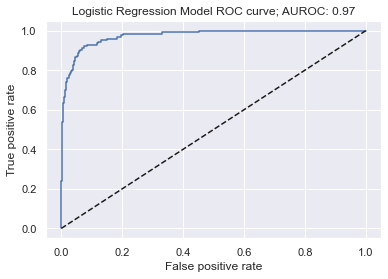

In [372]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = regression_model.predict_proba(np.array(X_Test))[:,1]
# print(y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()


### Random Forest

In [373]:
rf_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_Train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [374]:
Y_Pred = rf_classifier.predict(X_Test)

In [375]:
cm = confusion_matrix(y_test, Y_Pred)

In [376]:
accuracy = accuracy_score(y_test, Y_Pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


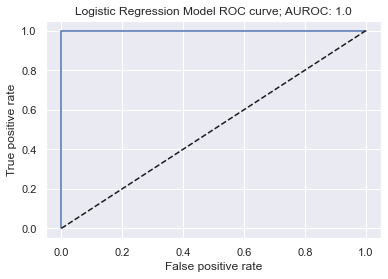

In [378]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = rf_classifier.predict_proba(np.array(X_Test))[:,1]
# print(y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()
